# Homework 2 - Generalized Hough Transform

## Theory

Task 1: ii

Task 2: i

In [ ]:
123

## Programming

Find object in an image using a template:  
![title](data/template.jpg)
![title](data/query.jpg)

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import cv2
import utils
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def nonMaxSuprression(img, d=5):
    """
    Given an image set all values to 0 that are not
    the maximum in its (2d+1,2d+1)-window

    Parameters
    ----------
    img : ndarray
        an image
    d : int
        for each pixels consider the surrounding (2d+1,2d+1)-window

    Returns
    -------
    result : ndarray

    """
    rows,cols = img.shape
    result = np.zeros((rows,cols))
    
    for row in range(0,img.shape[0]):
        for col in range(0,img.shape[1]):
            r_min=row-2*d
            r_max=row+2*d+1
            c_min=col-2*d
            c_max=col+2*d+1
            
            if row<=2*d:
                r_min=0
            if col<=2*d:
                c_min=0
            if rows-row<=2*d:
                r_min=0
            if cols-col<=2*d:
                c_min=0  
                
            result[row,col]=img[row,col] if img[row,col]==np.max(img[r_min:r_max,c_min:c_max])\
            and np.max(result[r_min:r_max,c_min:c_max]) == 0 else 0
            
    # TODO
    # iterate over pixels
    # iterate over (2d+1,2d+1) neighborhood window
    # supress non-maxima to 0
    # store results in new array
    
    return result

def calcBinaryMask(img, thresh = 0.3):
    """
    Compute the gradient of an image and compute a binary mask
    based on the threshold. Corresponds to O^B in the slides.

    Parameters
    ----------
    img : ndarray
        an image
    thresh : float
        A threshold value. The default is 0.3.

    Returns
    -------
    binary : ndarray
        A binary image.

    """
    
    gX=utils.calcDirectionalGrad(img)

    for row in range(0,gX.shape[0]):
        for cow in range(0,gX.shape[1]):
            gX[row,cow]=1 if np.abs(gX[row,cow])>np.max(np.abs(gX))*thresh else 0
                
    return gX

def correlation(img, template):
    """
    Compute a correlation of gradients between an image and a template.
    
    Note:
    You should use the formula in the slides using the fourier transform.
    Then you are guaranteed to succeed.
    
    However, you can also compute the correlation directly. 
    The resulting image must have high positive values at positions
    with high correlation.

    Parameters
    ----------
    img : ndarray
        a grayscale image
    template : ndarray
        a grayscale image of the template

    Returns
    -------
    ndarray
        an image containing the correlation between image and template gradients.
    """
    
    # TODO:
    # -compute gradient of the image
    img_gra=utils.calcDirectionalGrad(img)
                                      
    # -compute gradient of the template
    img_temp_binary=calcBinaryMask(template, thresh = 0.3)                              
                                       
    # -copy template gradient into larger frame

    img_temp=np.zeros_like(img_gra)
    img_temp[0:img_temp_binary.shape[0],0:img_temp_binary.shape[1]]=img_temp_binary
                                       
    # -apply a circular shift so the center of the original template is in the
    #   upper left corner     
    img_temp=utils.circularShift(img_temp,int(img_temp_binary.shape[1]/2)+1,int(img_temp_binary.shape[0]/2)+1)        
    
    # -normalize template
    img_temp=img_temp/np.sum(np.abs(img_temp))       
    
    img_f = np.fft.fft2(img_gra)
    img_f = np.fft.fftshift(img_f)
    
    te_f = np.fft.fft2(img_temp)
    te_f = np.fft.fftshift(te_f) 
    
    
    # -compute correlation
    vote=  img_f*np.conj(te_f)
    vote = np.abs(np.fft.ifft2(vote))     
    
    return vote
                                       
                              
def GeneralizedHoughTransform(img, template, angles, scales):
    """
    Compute the generalized hough transform. Given an image and a template.
    
    Parameters
    ----------
    img : ndarray
        A query image
    template : ndarray
        a template image
    angles : list[float]
        A list of angles provided in degrees
    scales : list[float]
        A list of scaling factors

    Returns
    -------
    hough_table : list[(correlation, angle, scaling)]
        The resulting hough table is a list of tuples.
        Each tuple contains the correlation and the corresponding combination
        of angle and scaling factors of the template.
        
        Note the order of these values.
    """
    
    # TODO:
    # for every combination of angles and scales 
    hough_table=[]  
    index=0
    for angle in angles:
        for scale in scales:        
            # -distort template
            temp=utils.rotateAndScale(template, angle, scale)
            
            # -compute the correlation
            cor=correlation(img, temp)
            hough_table.append((cor,angle,scale))    
            index=index+1
            print("finish a loop"+str(index))
            # -store results with parameters in a list                      
    
    return hough_table

# Main Program

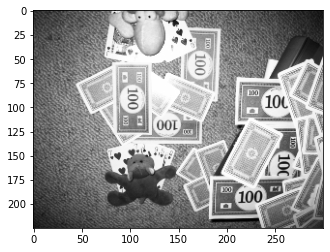

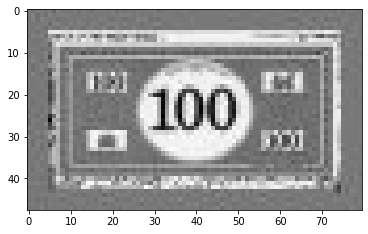

finish a loop1
finish a loop2
finish a loop3
finish a loop4
finish a loop5
finish a loop6
finish a loop7
finish a loop8
finish a loop9
finish a loop10
finish a loop11
finish a loop12
finish a loop13
finish a loop14
finish a loop15
finish a loop16
finish a loop17
finish a loop18
finish a loop19
finish a loop20
finish a loop21
finish a loop22
finish a loop23
finish a loop24
finish a loop25
finish a loop26
finish a loop27
finish a loop28
finish a loop29
finish a loop30
finish a loop31
finish a loop32
finish a loop33
finish a loop34
finish a loop35
finish a loop36
finish a loop37
finish a loop38
finish a loop39
finish a loop40
finish a loop41
finish a loop42
finish a loop43
finish a loop44
finish a loop45
finish a loop46
finish a loop47
finish a loop48
finish a loop49
finish a loop50
finish a loop51
finish a loop52
finish a loop53
finish a loop54
finish a loop55
finish a loop56
finish a loop57
finish a loop58
finish a loop59
finish a loop60
finish a loop61
finish a loop62
finish a loop63
f

In [19]:
# Load query image and template 
query = cv2.imread("data/query.jpg", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("data/template.jpg", cv2.IMREAD_GRAYSCALE)

# Visualize images
utils.show(query)
utils.show(template)

# Create search space and compute GHT
angles = np.linspace(0, 360, 36)
scales = np.linspace(0.9, 1.3, 10)
ght = GeneralizedHoughTransform(query, template, angles, scales)


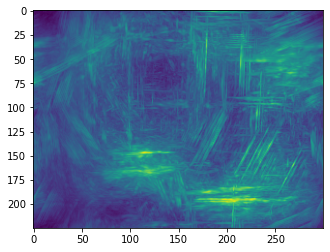

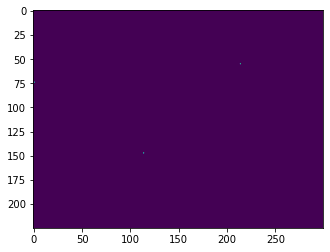

296 74
114 147
1 75
0 75
214 55
299 74
298 74
297 74
1 74
299 224


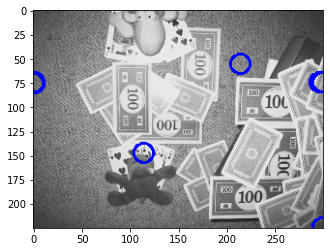

In [20]:

# extract votes (correlation) and parameters
votes, thetas, s = zip(*ght)

# Visualize votes
votes = np.stack(votes).max(0)

plt.imshow(votes)
plt.show()

# nonMaxSuprression
votes = nonMaxSuprression(votes, 40)
plt.imshow(votes)
plt.show()

# Visualize n best matches
n = 10
coords = zip(*np.unravel_index(np.argpartition(votes, -n, axis=None)[-n:], votes.shape))
vis = np.stack(3*[query],2)
for y,x in coords:
    print(x,y)
    vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
utils.show(vis)


# Test your implementation

In [ ]:
import utils
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def testGHT():
    query = cv2.imread("data/query.jpg", cv2.IMREAD_GRAYSCALE)
    template = cv2.imread("data/template.jpg", cv2.IMREAD_GRAYSCALE)
    

    angles = np.linspace(0, 360, 36)
    scales = np.linspace(0.9, 1.3, 10)
    ght = GeneralizedHoughTransform(query, template, angles, scales)
    
    votes, thetas, s = zip(*ght)
    votes = np.stack(votes).max(0)
    plt.imshow(votes)
    plt.show()

    #votes = correlation(query, template)
    votes = nonMaxSuprression(votes, 20)
    plt.imshow(votes)
    plt.show()

    n = 10
    coords = list(zip(*np.unravel_index(np.argpartition(votes, -n, axis=None)[-n:], votes.shape)))

    vis = np.stack(3*[query],2)
    for y,x in coords:
        vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
    utils.show(vis)

    f = open("centroids.txt", "r")
    centroids = f.read()
    f.close()
    
    centroids = centroids.split("\n")[:-1]
    centroids = [centroid.split() for centroid in centroids]
    centroids = np.array([[int(centroid[0]),int(centroid[1])] for centroid in centroids])
    
    vis = np.stack(3*[query],2)
    for x,y in centroids:
        vis = cv2.circle(vis,(x,y), 10, (255,0,0), 2)
    utils.show(vis)
    
    coords = np.array(coords)[:,::-1]

    
    d = euclidean_distances(centroids, coords).min(1)
    
    correct_detections = np.count_nonzero((d<10))
    
    score = { "scores": {"Correct_Detections": correct_detections }}
    
    print(json.dumps(score))

testGHT()